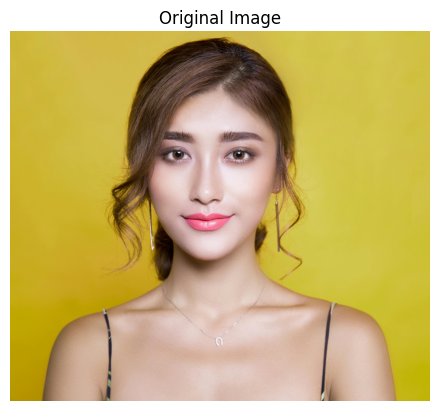

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
%matplotlib inline

img = cv2.imread("../data/raw/sample.jpg")
if img is None:
    raise Exception("Image not found!")

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [18]:
mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.6
) as face_mesh:

    results = face_mesh.process(rgb)

    if not results.multi_face_landmarks:
        print("No face detected.")
    else:
        landmarks = results.multi_face_landmarks[0]


rgb type/shape: <class 'numpy.ndarray'> (5075, 5760, 3)
Detected landmarks count: 478
Image width x height: 5760 x 5075 channels: 3


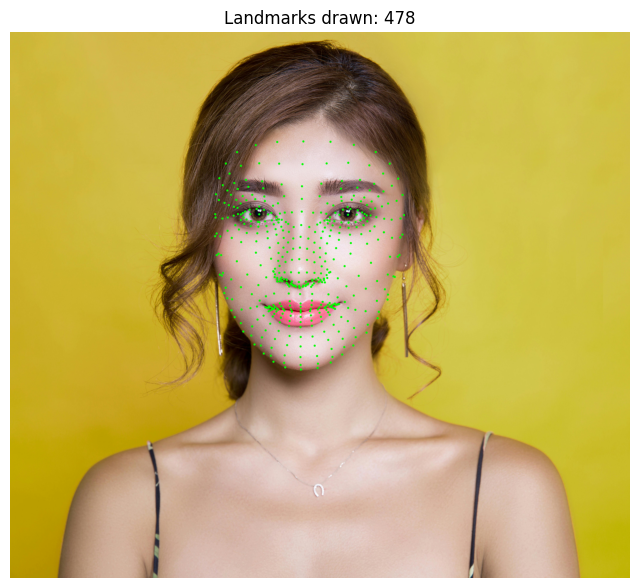

Saved debug image to ../data/processed/landmarks_debug.png
First 5 landmark pixel coords: [(2699, 2528), (2683, 2329), (2692, 2384), (2630, 2019), (2683, 2242)]


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Preconditions: 'rgb' (numpy array) and 'landmarks' (MediaPipe result) must exist ---
print("rgb type/shape:", type(rgb), getattr(rgb, "shape", None))

# Check landmarks existence
try:
    n_landmarks = len(landmarks.landmark)
except Exception as e:
    n_landmarks = 0
print("Detected landmarks count:", n_landmarks)

if n_landmarks == 0:
    raise RuntimeError("No landmarks found. Make sure MediaPipe FaceMesh detected a face. "
                       "Check results.multi_face_landmarks before accessing landmarks.")

# Dimensions
h, w, c = rgb.shape
print("Image width x height:", w, "x", h, "channels:", c)

# Convert to BGR for OpenCV drawing consistency, then back to RGB for plotting
landmark_img_bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

landmark_points = []
# choose a larger radius and visible thickness
radius = max(2, int(min(h, w) * 0.002))  # adaptive small circle
thickness = -1  # filled

# Also draw index numbers for the first 10 points to verify
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.4

for i, lm in enumerate(landmarks.landmark):
    # Ensure lm.x and lm.y are numbers in [0,1]
    x = int(np.clip(lm.x * w, 0, w-1))
    y = int(np.clip(lm.y * h, 0, h-1))
    landmark_points.append((x, y))
    # Draw a red dot (BGR) so it's visible: (0,0,255) is red in BGR
    cv2.circle(landmark_img_bgr, (x, y), radius, (0, 255, 0), thickness)  # green in BGR

   
# Convert back to RGB for matplotlib
landmark_img_rgb = cv2.cvtColor(landmark_img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(landmark_img_rgb)
plt.axis("off")
plt.title(f"Landmarks drawn: {len(landmark_points)}")
plt.show()

# Save debug image (optional)
cv2.imwrite("../data/processed/landmarks_debug.png", landmark_img_bgr)
print("Saved debug image to ../data/processed/landmarks_debug.png")

# Print first 5 landmark pixel coords to inspect values
print("First 5 landmark pixel coords:", landmark_points[:5])



In [28]:
landmarks_np = np.array([
    (int(lm.x * w), int(lm.y * h))
    for lm in landmarks.landmark
])

np.save("../data/processed/landmarks_sample.npy", landmarks_np)
print("Saved landmarks:", landmarks_np.shape)


Saved landmarks: (478, 2)


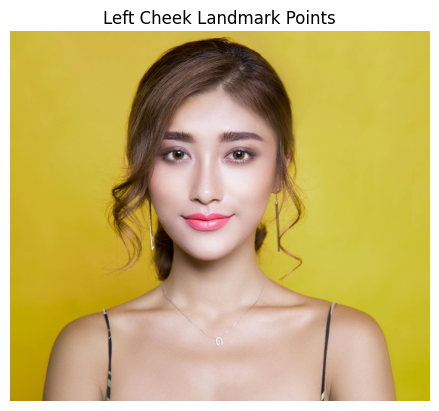

In [16]:
left_cheek = [50, 123, 128, 118, 51, 234]

cheek_img = rgb.copy()

for idx in left_cheek:
    x, y = landmark_points[idx]
    cv2.circle(cheek_img, (x, y), 3, (255, 0, 0), -1)

plt.imshow(cheek_img)
plt.axis("off")
plt.title("Left Cheek Landmark Points")
plt.show()
